In [254]:
# Visualizing New Year's Resolutions for GB
# References: 
## https://www.r-bloggers.com/understanding-new-years-resolutions-with-google-trends-in-r/
## https://cran.r-project.org/web/packages/gtrendsR/gtrendsR.pdf
## https://cran.r-project.org/web/packages/ggseas/vignettes/ggseas.html
## https://support.google.com/trends/answer/4365533?hl=en
# https://poseidon01.ssrn.com/delivery.php?ID=908065002113091025029029002112016092002057081068083017073028122026122026111000076025031050122061114096018115065008093017080070000023046060084070116010087092079074119027093041070085004083002081123010108064124090072077011111005024007069087073120003022093&EXT=pdf

In [255]:
# Need to install some packages
# install.packages("gtrendsR")
# install.packages("ggseas")
# install.packages("xts")
# install.packages("ggfortify")
# install.packages("forecast")

# library(scales)
library(gtrendsR) 
library(ggplot2)
library(lubridate)
# library(repr)
# library(ggseas)
# library(zoo)
# library(xts)
library(dplyr)
# library(tidyr)
# library(ggfortify)
# library(forecast)

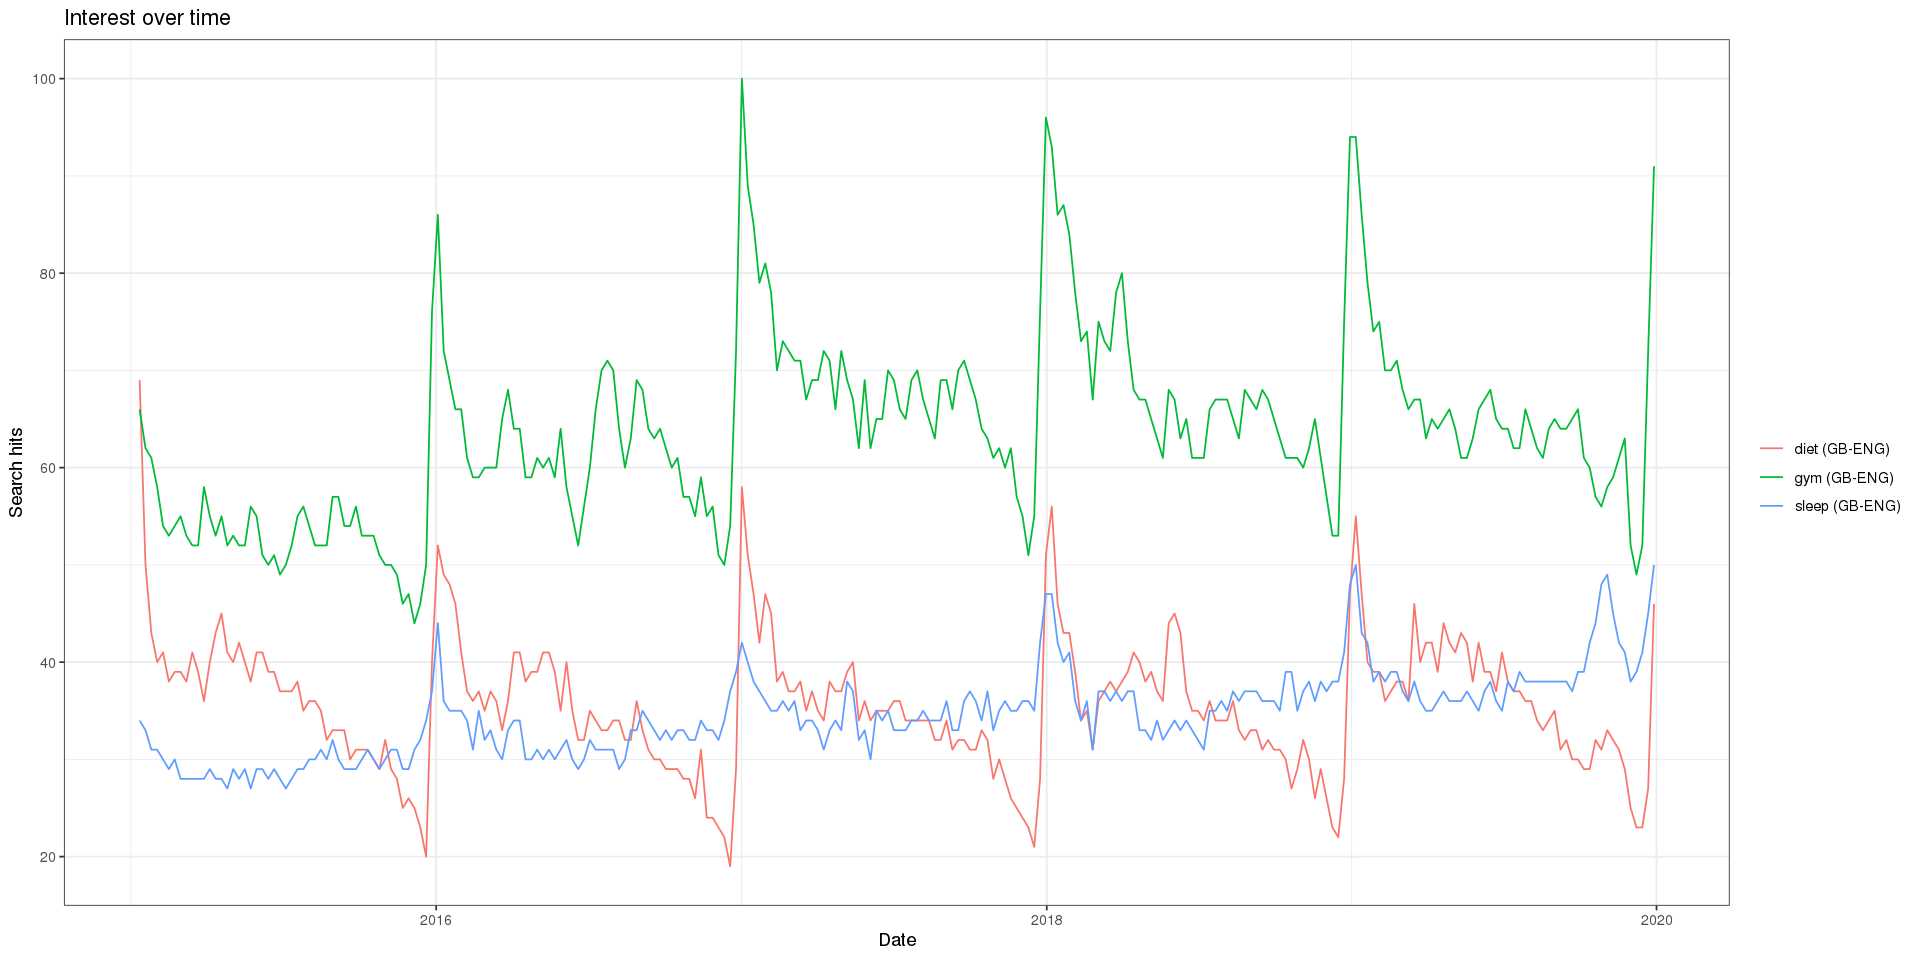

In [256]:
# quick look at last trend over last 5y
res <- gtrends(c("gym", "diet", "sleep"), geo = c("GB-ENG"), time = c("today+5-y"), gprop = c("web"), onlyInterest = TRUE)
plot(res)

In [257]:
# resolution from Google Trends varies by amount of time selected... so, stitch together 2 5-year ranges...
res5yr <- gtrends(c("gym", "diet", "sleep"), geo = c("GB-ENG"), time = c("2015-01-04 2020-01-05"), gprop = c("web"), onlyInterest = TRUE)
res10yr <- gtrends(c("gym", "diet", "sleep"), geo = c("GB-ENG"), time = c("2009-12-27 2014-12-28"), gprop = c("web"), onlyInterest = TRUE)

res <- bind_rows(res5yr$interest_over_time, res10yr$interest_over_time)

Warning message:
“Removed 3 rows containing missing values (geom_path).”


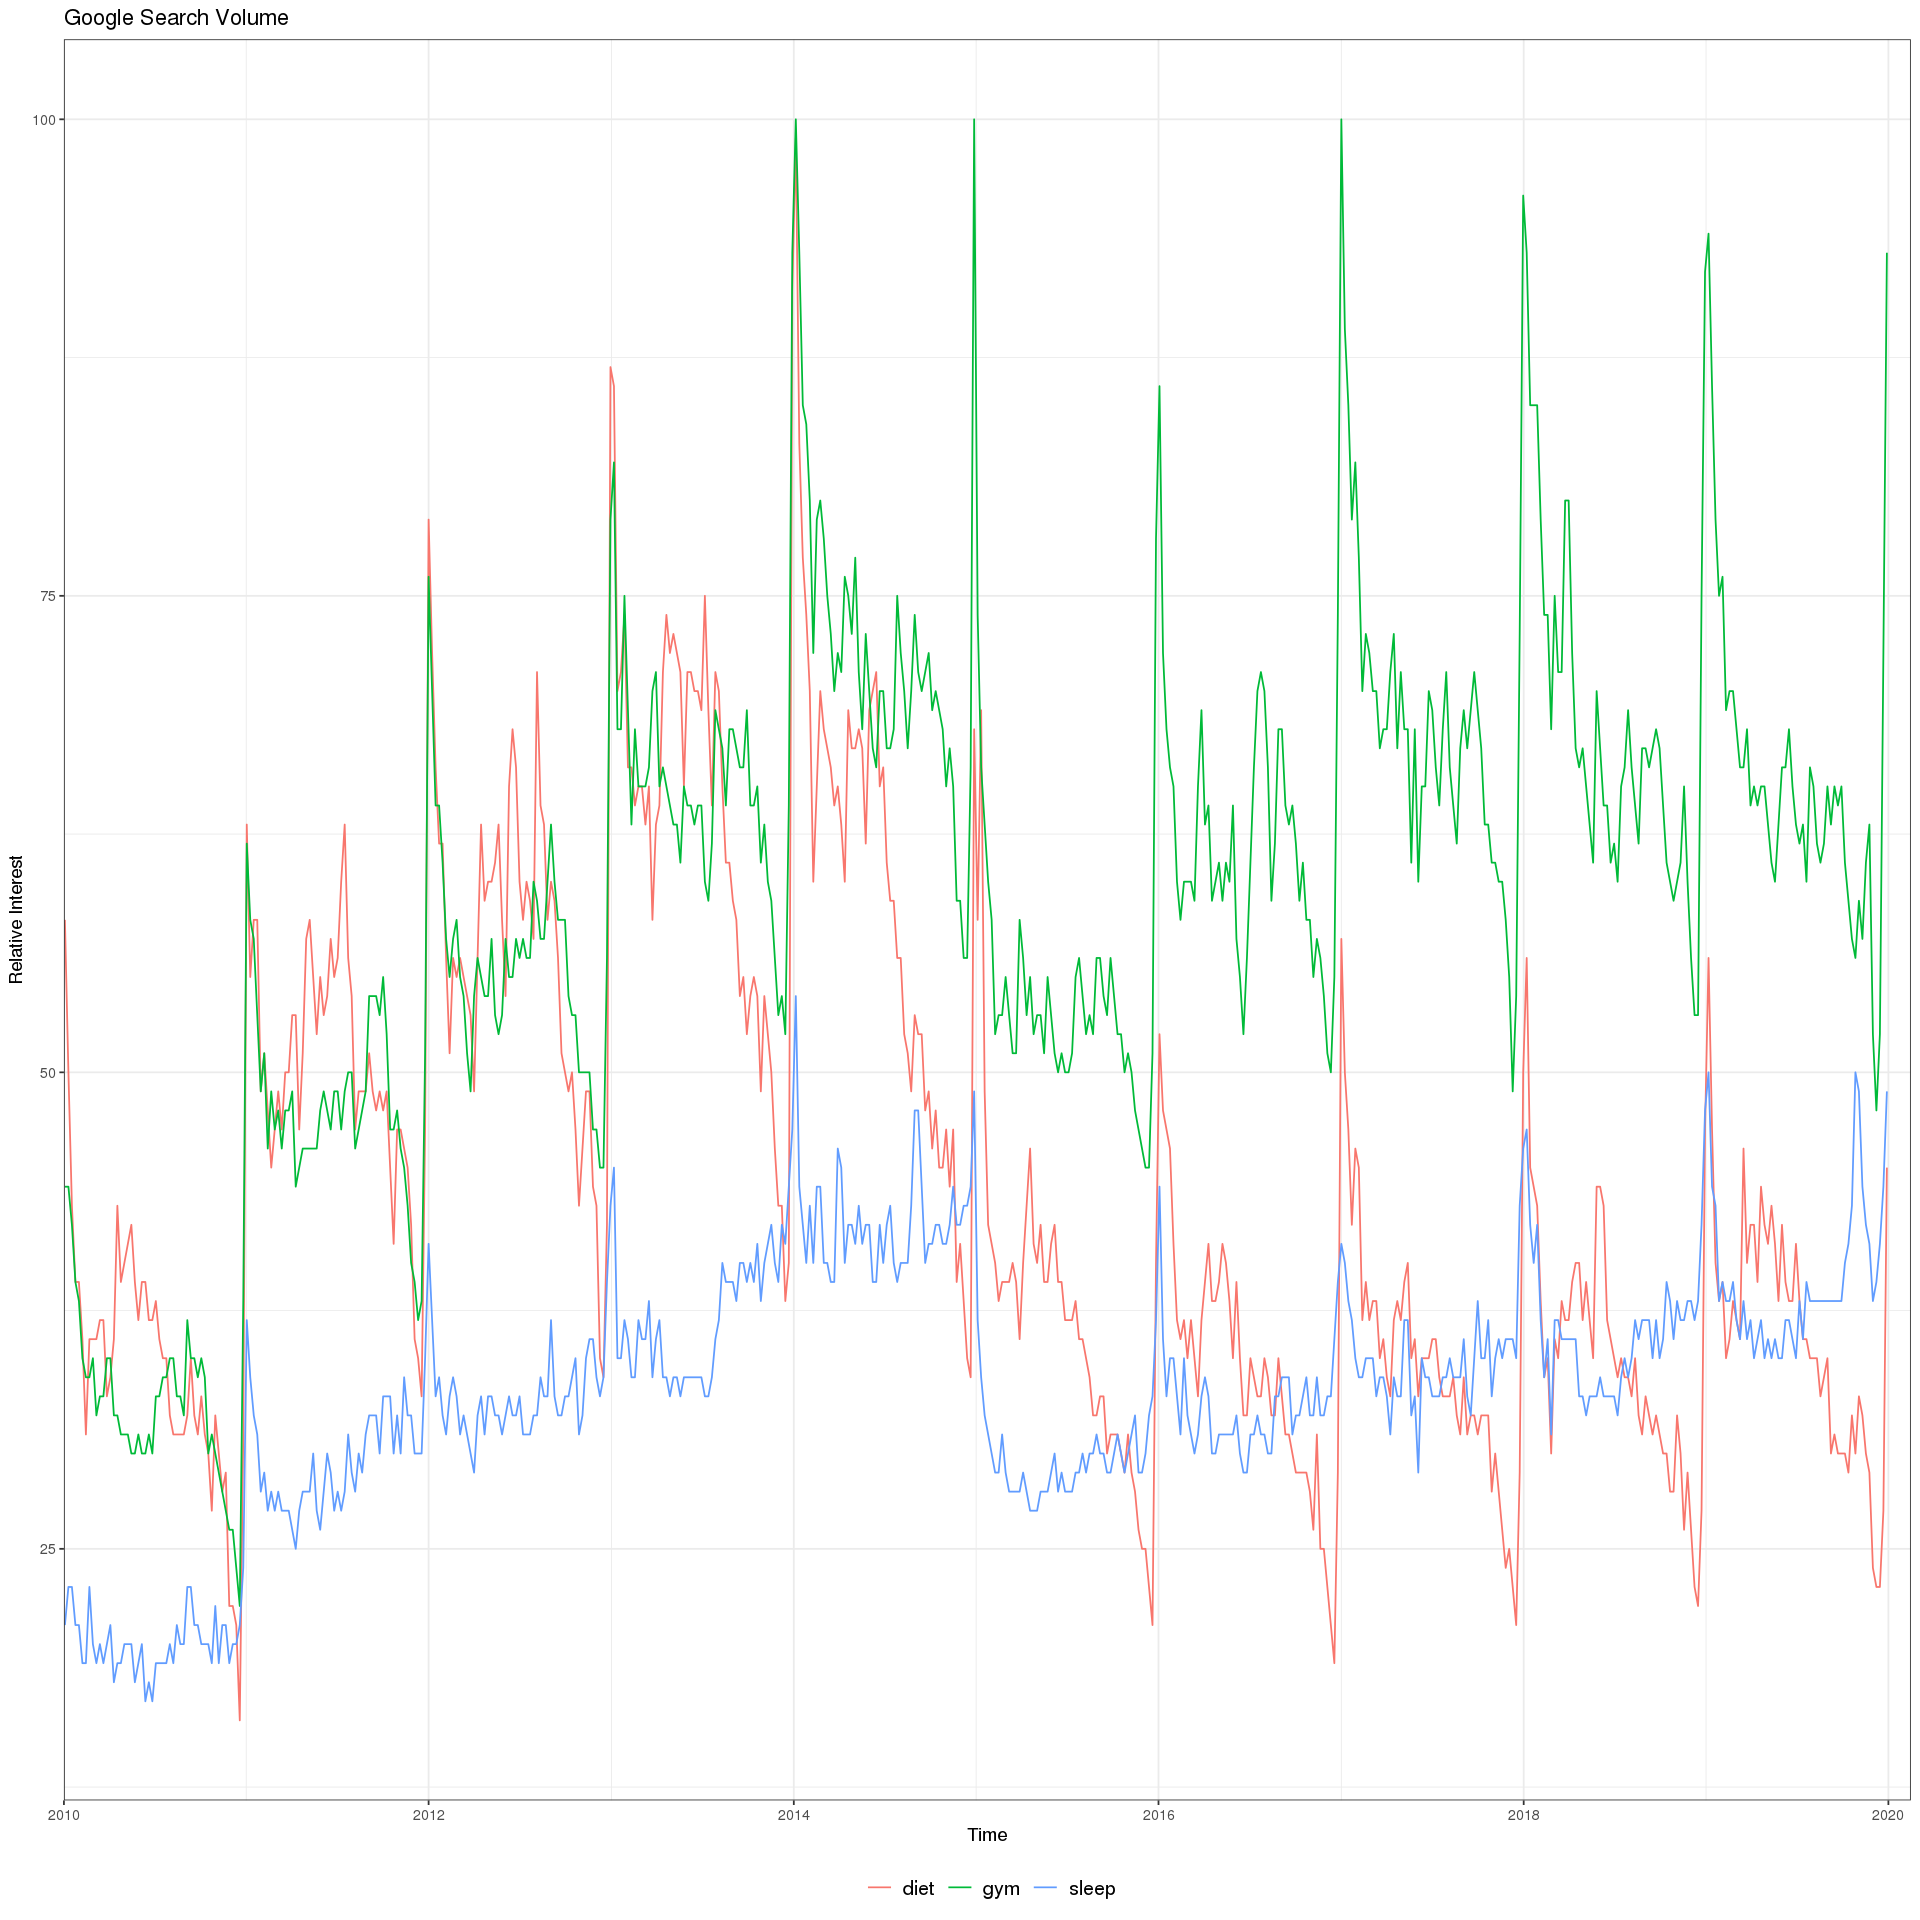

In [263]:
# Plot
options(repr.plot.width=16, repr.plot.height=16)

plot<-ggplot(data=res, aes(x=as.Date(date), y=hits,group=keyword,col=keyword))+
        geom_line()+xlab('Time')+ylab('Relative Interest')+ theme_bw()+
        theme(legend.title = element_blank(),legend.position="bottom",legend.text=element_text(size=12))+ggtitle("Google Search Volume") +
        scale_x_date(breaks = "2 years", 
                     minor_breaks = "1 year", 
                     date_labels = "%Y",
                     limits = c(min = as.Date("2010-01-01"), max= as.Date("2020-02-15")),
                     expand=c(0,0))
plot

In [264]:
# center by keyword, scale

scale_this <- function(x){
  (x - mean(x, na.rm=TRUE)) / sd(x, na.rm=TRUE)
}

# res2 <- gtrends(c("gym", "diet", "sleep"), geo = c("GB-ENG"), gprop = c("web"), onlyInterest = TRUE)
# res2 <- res2$interest_over_time

resC <- res %>%
        filter(date > as.Date("2014-11-01")) %>%
        group_by(keyword) %>%
        mutate(cent = scale(hits))

head(resC)
summary(resC)

date,hits,geo,time,keyword,gprop,category,weeknum,yearnum,monthnum,nye,cent
<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-04,74,GB-ENG,2015-01-04 2020-01-05,gym,web,0,1,2015,1,1,1.06761904
2015-01-11,66,GB-ENG,2015-01-04 2020-01-05,gym,web,0,2,2015,1,0,0.24107527
2015-01-18,63,GB-ENG,2015-01-04 2020-01-05,gym,web,0,3,2015,1,0,-0.06887865
2015-01-25,60,GB-ENG,2015-01-04 2020-01-05,gym,web,0,4,2015,1,0,-0.37883256
2015-02-01,58,GB-ENG,2015-01-04 2020-01-05,gym,web,0,5,2015,2,0,-0.58546850
2015-02-08,52,GB-ENG,2015-01-04 2020-01-05,gym,web,0,6,2015,2,0,-1.20537633


      date                          hits            geo           
 Min.   :2014-11-02 00:00:00   Min.   : 19.00   Length:810        
 1st Qu.:2016-02-14 00:00:00   1st Qu.: 33.00   Class :character  
 Median :2017-05-31 12:00:00   Median : 38.00   Mode  :character  
 Mean   :2017-05-31 12:00:00   Mean   : 44.73                     
 3rd Qu.:2018-09-16 00:00:00   3rd Qu.: 57.75                     
 Max.   :2019-12-29 00:00:00   Max.   :100.00                     
     time             keyword             gprop              category
 Length:810         Length:810         Length:810         Min.   :0  
 Class :character   Class :character   Class :character   1st Qu.:0  
 Mode  :character   Mode  :character   Mode  :character   Median :0  
                                                          Mean   :0  
                                                          3rd Qu.:0  
                                                          Max.   :0  
    weeknum         yearnum        monthn

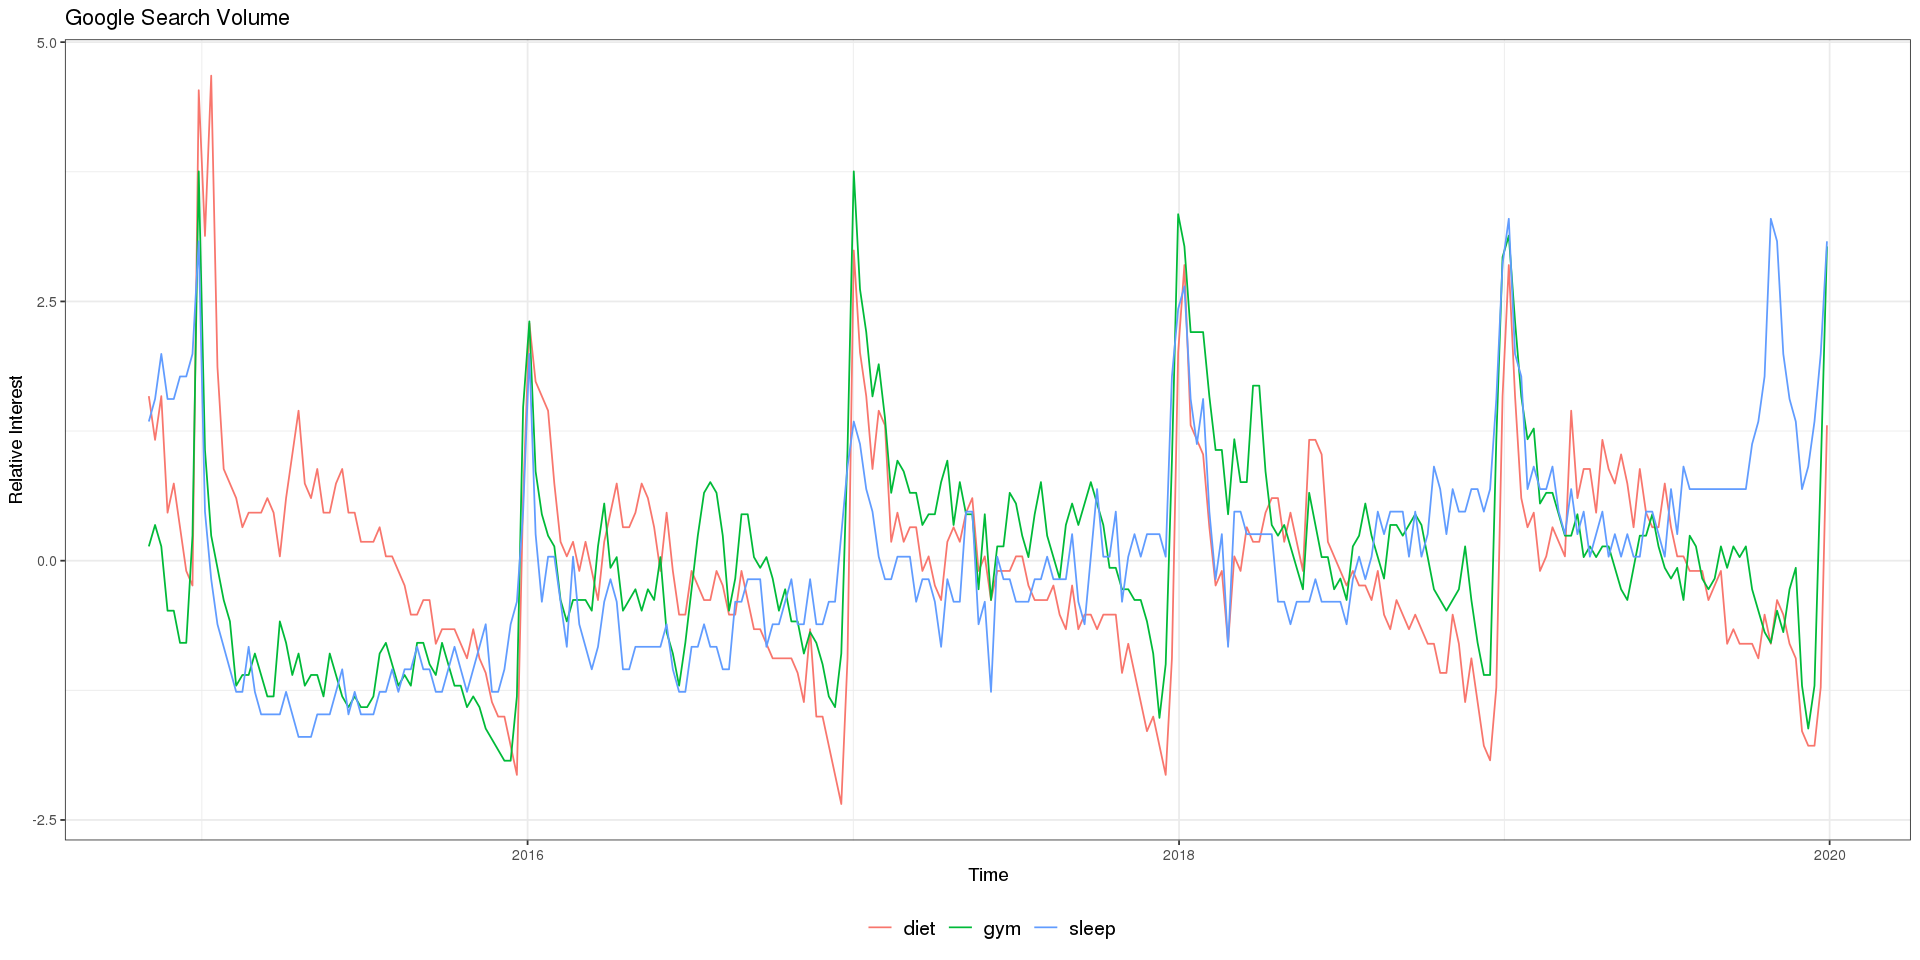

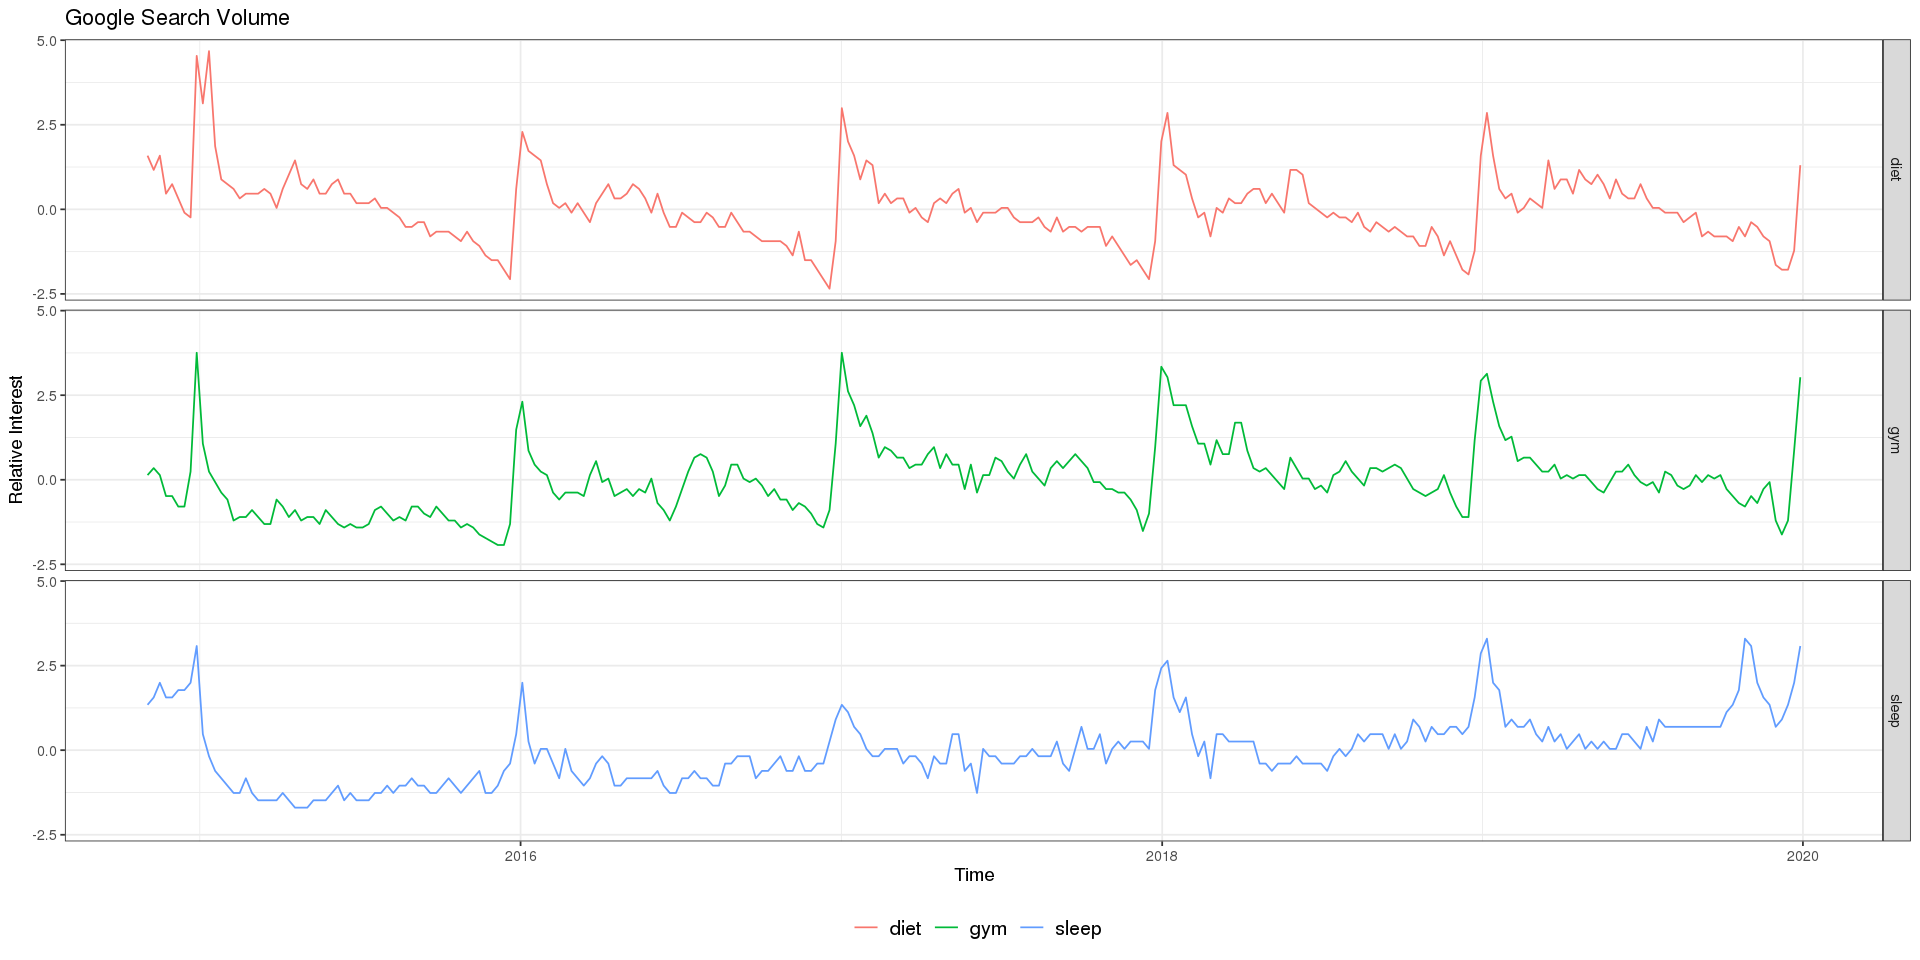

In [260]:
plot<-ggplot(data=resC, aes(x=as.Date(date), y=cent, group=keyword,col=keyword))+
        geom_line()+xlab('Time')+ylab('Relative Interest')+ theme_bw()+
        theme(legend.title = element_blank(),legend.position="bottom",legend.text=element_text(size=12))+ggtitle("Google Search Volume")

plot
plot + facet_grid(keyword~.)

      date                 hits            geo                time          
 Min.   :2009-12-27   Min.   : 16.00   Length:1569        Length:1569       
 1st Qu.:2012-06-24   1st Qu.: 33.00   Class :character   Class :character  
 Median :2014-12-28   Median : 41.00   Mode  :character   Mode  :character  
 Mean   :2014-12-28   Mean   : 45.57                                        
 3rd Qu.:2017-07-02   3rd Qu.: 58.00                                        
 Max.   :2019-12-29   Max.   :100.00                                        
   keyword             gprop              category    weeknum     
 Length:1569        Length:1569        Min.   :0   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:0   1st Qu.:14.00  
 Mode  :character   Mode  :character   Median :0   Median :27.00  
                                       Mean   :0   Mean   :26.65  
                                       3rd Qu.:0   3rd Qu.:40.00  
                                       Max.   :0   Max.   :

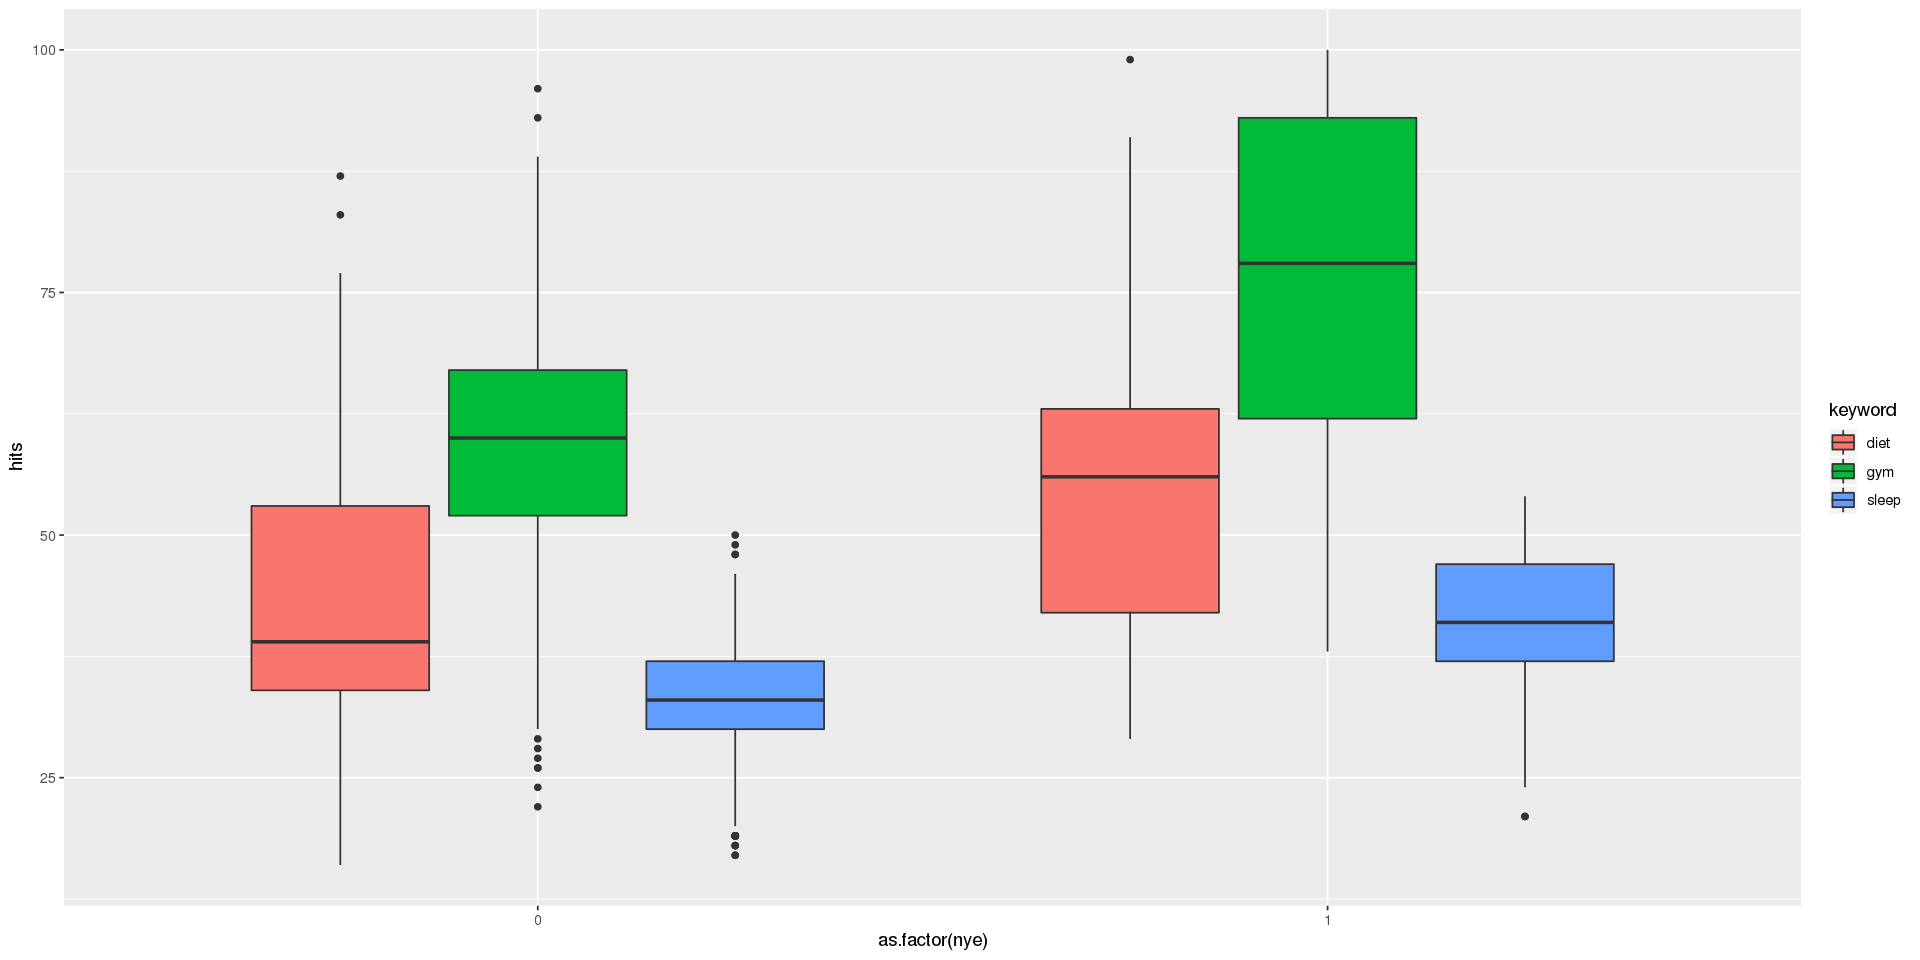

In [261]:
# Encode var for new years -- 1 week pre and post Jan1
res$weeknum <- week(res$date)
res$yearnum <- year(res$date)
res$monthnum <- month(res$date)

# res[res$weeknum == 53, "weeknum"] <- 52

res$nye <- 0
res[res$weeknum == 52, "nye"] <- 1
res[res$weeknum == 1, "nye"] <- 1

summary(res)

nyeplot <- ggplot(data = res, aes(x = as.factor(nye), y = hits, fill = keyword)) +
    geom_boxplot()
nyeplot



Call:
lm(formula = hits ~ date + keyword * nye, data = res2)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.506  -3.213  -0.303   2.955  37.144 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.490e+01  7.441e+00  -3.346 0.000859 ***
date              3.994e-08  4.957e-09   8.058 2.93e-15 ***
keywordgym        2.774e+01  5.642e-01  49.162  < 2e-16 ***
keywordsleep     -8.008e-01  5.642e-01  -1.419 0.156195    
nye               1.193e+01  2.038e+00   5.854 7.10e-09 ***
keywordgym:nye    1.106e+01  2.882e+00   3.838 0.000134 ***
keywordsleep:nye -2.599e+00  2.882e+00  -0.902 0.367464    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.32 on 776 degrees of freedom
Multiple R-squared:  0.831,	Adjusted R-squared:  0.8297 
F-statistic: 635.9 on 6 and 776 DF,  p-value: < 2.2e-16


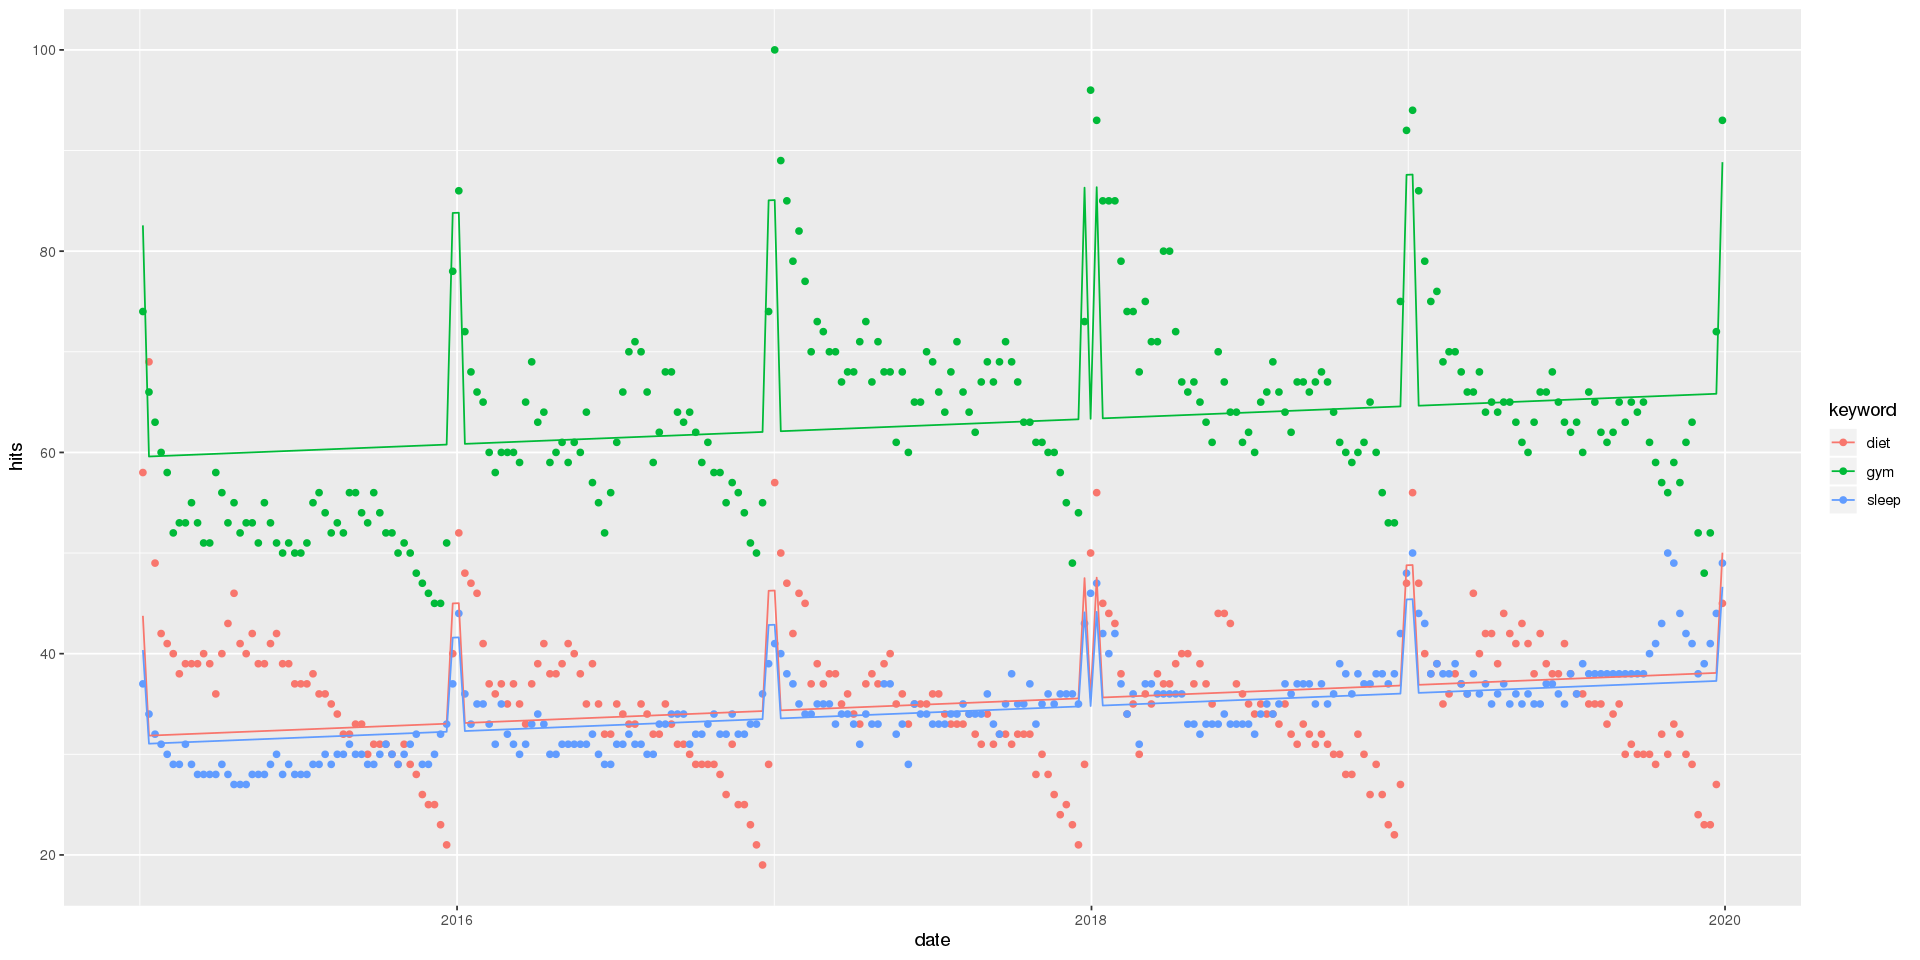

In [262]:
# Regression time
res2 <- filter(res, year(date) > 2014)

linmod <- lm(hits ~ date + 
             keyword *
             nye,
             data = res2)
summary(linmod)

res2$predicted <- predict(linmod)   # Save the predicted values
res2$residuals <- residuals(linmod) # Save the residual values

ggplot(res2, aes(x = date, y = hits, color = keyword)) + 
    geom_point() +
    geom_line(aes(y = predicted))

In [ ]:
weekplot <- ggplot(data = res, aes(x = as.factor(weeknum), y = hits, fill = keyword)) +
    geom_boxplot()
weekplot
weekplot + facet_grid(keyword~.)

monthplot <- ggplot(data = res, aes(x = as.factor(monthnum), y = hits, fill = keyword)) +
    geom_boxplot()
monthplot
monthplot + facet_grid(keyword~.)

In [ ]:
res %>%
    group_by(weeknum) %>%
    summarize(count = n())

In [ ]:
summary(res7d)
d7res <- res7d$interest_over_time %>%
    mutate(date = as.Date(date)) %>%
    select(date, hits, keyword) %>%
    group_by(date, keyword) %>%
    summarize(avg_hits = mean(hits),
              count = n(),
              max_hits = max(hits),
              hits = sum(hits))

head(d7res)
# date2 <- as.Date(d7res$date)
# date2

In [ ]:
# res <- gtrends(c("gym", "diet", "sleep"), geo = c("GB-ENG"), time = as.character(range), gprop = c("web"))
res <- gtrends(c("gym", "diet", "sleep"), geo = c("GB-ENG"), time = "now 7-d", gprop = c("web"))
options(repr.plot.width=16, repr.plot.height=8)
plot(res)
res

In [ ]:
# better plot
#select only interest over time 
time_trend=res$interest_over_time
time_trend$date = as.Date(time_trend$date)
head(time_trend)

plot<-ggplot(data=time_trend, aes(x=date, y=hits,group=keyword,col=keyword))+
        geom_line()+xlab('Time')+ylab('Relative Interest')+ theme_bw()+
        theme(legend.title = element_blank(),legend.position="bottom",legend.text=element_text(size=12))+ggtitle("Google Search Volume") +
    #    geom_smooth(span=0.1,se=FALSE)+xlab('Time')+ylab('Relative Interest') + 
        scale_x_date(breaks = "1 year", minor_breaks = "1 year")
plot

In [ ]:
head(time_trend$date)
max(as.POSIXct(as.Date(time_trend$date)))

In [ ]:
# time series
# manipulate data frame
ts_ny <- time_trend %>%
    select(date, hits, keyword) %>%
    spread(keyword, hits)
plot(ts_ny)


In [ ]:
# Adjustment

time_trend$date2 <- as.Date(time_trend$date)
ggplot(time_trend, aes(x = date2, y = hits, colour = keyword)) +
  geom_line(linetype = 2) +
  facet_wrap(~keyword) +
  stat_seas(start = c(2009, 12), frequency = 12) +
  ggtitle("Seasonally adjusted resolutions in the UK")

In [ ]:
#define the keywords
keywords=c("good resolutions","quit smoking","diet","travel","dating","gym","save+money","healthy")
#set the geographic area: GB = Great Britian
country=c('GB')
#set the time window
time=("2010-01-01 2020-01-01")
#set channels 
channel='web'

In [ ]:
trends = gtrends(keywords, gprop =channel,geo=country, time = time )
#select only interst over time 
time_trend=trends$interest_over_time
head(time_trend)